# A Beginner's Guide to Perform Exploratory Data Analysis Using Grocery Sales Dataset

## Introduction

The objective of this notebook is to use the simple functions in Pandas to analyze the grocery sales dataset and then visualize it using Seaborn. Apart from deriving some summary metrics, we'll also frame some questions and find answers from the dataset by delving into it. This will be a very good practise for data analytics enthusiasts.

## Table of Contents

* Importing Libraries and Dataset
* Data Manipulation
* Preparing Summary Metrics
* Answering the Questions
* Conclusion

## Importing Libraries and Dataset

We'll be using Pandas for data analysis and Matplotlib & Seaborn for data visualization.

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Let us read the input dataset and store it in a dataframe. After loading it, we'll take a look at any 5 rows from the dataframe to understand the data. We'll use sample() to extract few samples out of the dataframe.

Alternatively, you can use .head() or .tail() functions to extract the first N or the last N rows respectively.

In [4]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.sample(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
1532,OD1533,Vidya,Beverages,Soft Drinks,Vellore,12-06-2015,Central,2182,0.12,829.16,Tamil Nadu
5438,OD5439,Hussain,Beverages,Soft Drinks,Namakkal,1/20/2015,South,1393,0.30,431.83,Tamil Nadu
4007,OD4008,Sheeba,Food Grains,Rice,Madurai,2/16/2017,South,1815,0.15,254.10,Tamil Nadu
8957,OD8958,Esther,Food Grains,Rice,Cumbum,9/19/2017,East,1712,0.10,342.40,Tamil Nadu
2597,OD2598,Ravi,Food Grains,Atta & Flour,Theni,1/29/2018,Central,2437,0.11,121.85,Tamil Nadu


Let us quickly check the information about the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


We'll take a look at the Region column to understand the spread of different categories. 

## Data Manipulation

In [6]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

As we see, there is only one datapoint for the North region. This might be added by mistake, so we'll drop the row. This is not going to make a big difference in the dataset.

In [7]:
df.drop((df[df['Region']=='North']).index, inplace=True)

We'll now extract the year from the order date. The Order Date is in the string type, so let us use the string manipulation technique to do the same.

In [8]:
df['Order Year'] = df['Order Date'].str[-4:]
df['Order Year'].value_counts()

2018    3312
2017    2586
2016    2102
2015    1993
Name: Order Year, dtype: int64

## Preparing Summary Metrics

Let us prepare the summary metrics one by one. We'll start with the region wise analysis of sales and orders. We'll use pivot_table() function throughout this notebook. Please pay attention on how the aggfunc() could be tailored for our requirements.

### Total Sales & Orders by Region

In [9]:
region = pd.pivot_table(data=df, index='Region', values=['Order ID', 'Sales'], 
               aggfunc = {'Order ID':'count', 'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
region

,Region,Order ID,Sales
3,West,3203,4798743
1,East,2848,4248368
0,Central,2323,3468156
2,South,1619,2440461


We'll now plot two graphs to visualize the total sales and orders by each region. I did not not plot both the details in the same graph because of one reason. The range of each of the columns is very different. Our graph will look weird if we plot both the details in the same plot. We could rescale it to fit both of them within the same range, but that will change the actual values. 

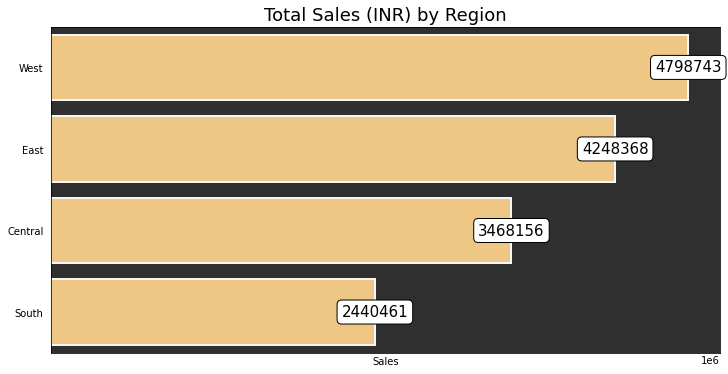

In [10]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (12,6)

# setting the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2f')

# plotting a bar graph
sns.barplot(y='Region', x='Sales', data=region, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

# annotating the values on the plot
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# formatting the graph
plt.title('Total Sales (INR) by Region', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)

plt.show()

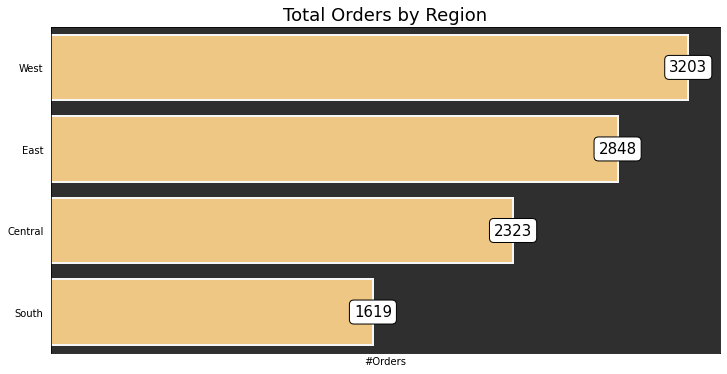

In [11]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (12,6)

# setting the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2f')

# plotting a bar graph
sns.barplot(y='Region', x='Order ID', data=region, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

# annotating the values on the plot
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# formatting the graph
plt.title('Total Orders by Region', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.xlabel('#Orders')
plt.ylabel(None)

plt.show()

### Total Sales by Category & Sub Category

We'll now find the total sales by Category and further group it down to each Sub Category within it. We'll assign two values within the index parameter of the .pivot_table() function to achieve the results.

In [12]:
category_sales = pd.pivot_table(data=df, index=['Category', 'Sub Category'], values='Sales', 
               aggfunc='sum').reset_index().sort_values(['Category', 'Sales'], ascending=False)
category_sales

,Category,Sub Category,Sales
21,Snacks,Cookies,768213
22,Snacks,Noodles,735435
20,Snacks,Chocolates,733898
18,Oil & Masala,Masalas,696226
19,Oil & Masala,Spices,672876
17,Oil & Masala,Edible Oil & Ghee,668086
13,Fruits & Veggies,Fresh Fruits,551212
14,Fruits & Veggies,Fresh Vegetables,525842
16,Fruits & Veggies,Organic Vegetables,520271
15,Fruits & Veggies,Organic Fruits,503402


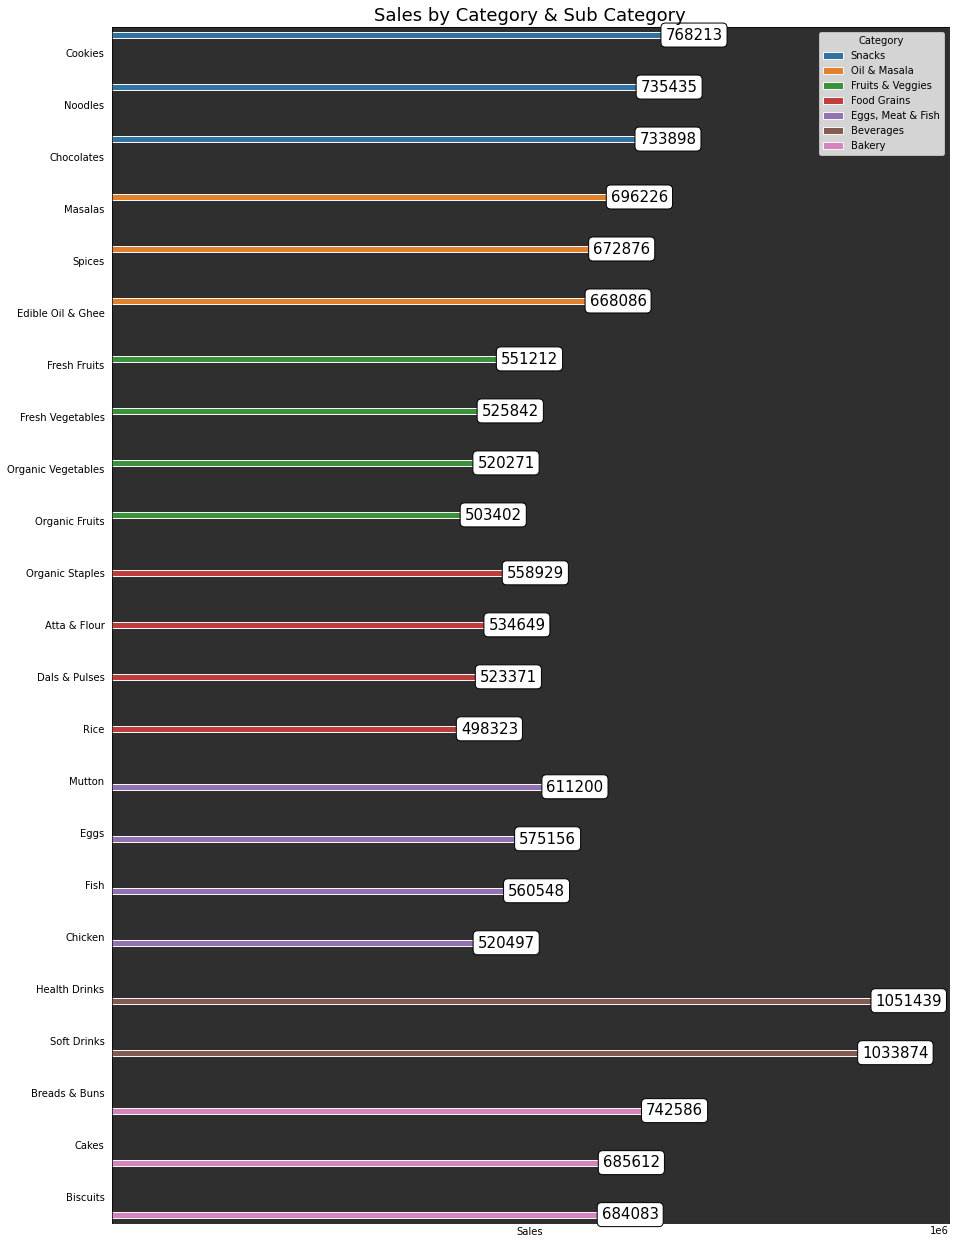

In [13]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (15,22)

# setting the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2F')

# plotting a bar plot with Category as the distinguishing parameter
sns.barplot(y='Sub Category', x='Sales', data=category_sales, hue='Category', linewidth=1, edgecolor='#F6F6F6')

# annotating the values on the plot
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# formatting the graph
plt.title('Sales by Category & Sub Category', fontsize = 18)
plt.ylabel(None)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.show()

The hue parameter of the barplot() helped us distinguish the Sub Categories by the Category to which they belong to.

### Profit Margin by Sub Category

The profit margin can be calculated by dividing the profit by the total sales. As this needs to be computed for each sub category, we did not compute this on the original dataset. First let us group the data by sub category and then compute the profit margin.

In [14]:
profit = pd.pivot_table(data=df, index='Sub Category', values=['Sales', 'Profit'], aggfunc='sum').reset_index()
profit['Profit Margin'] = round((profit['Profit']/profit['Sales']) * 100,2)
profit.sort_values(by='Profit Margin', ascending=False, inplace = True)
profit

,Sub Category,Profit,Sales,Profit Margin
16,Noodles,193685.81,735435,26.34
10,Fish,147248.01,560548,26.27
17,Organic Fruits,130862.33,503402,26.00
18,Organic Staples,144136.89,558929,25.79
2,Breads & Buns,190764.98,742586,25.69
19,Organic Vegetables,133596.37,520271,25.68
20,Rice,126932.36,498323,25.47
13,Health Drinks,267469.79,1051439,25.44
8,Edible Oil & Ghee,168593.58,668086,25.24
9,Eggs,144669.92,575156,25.15


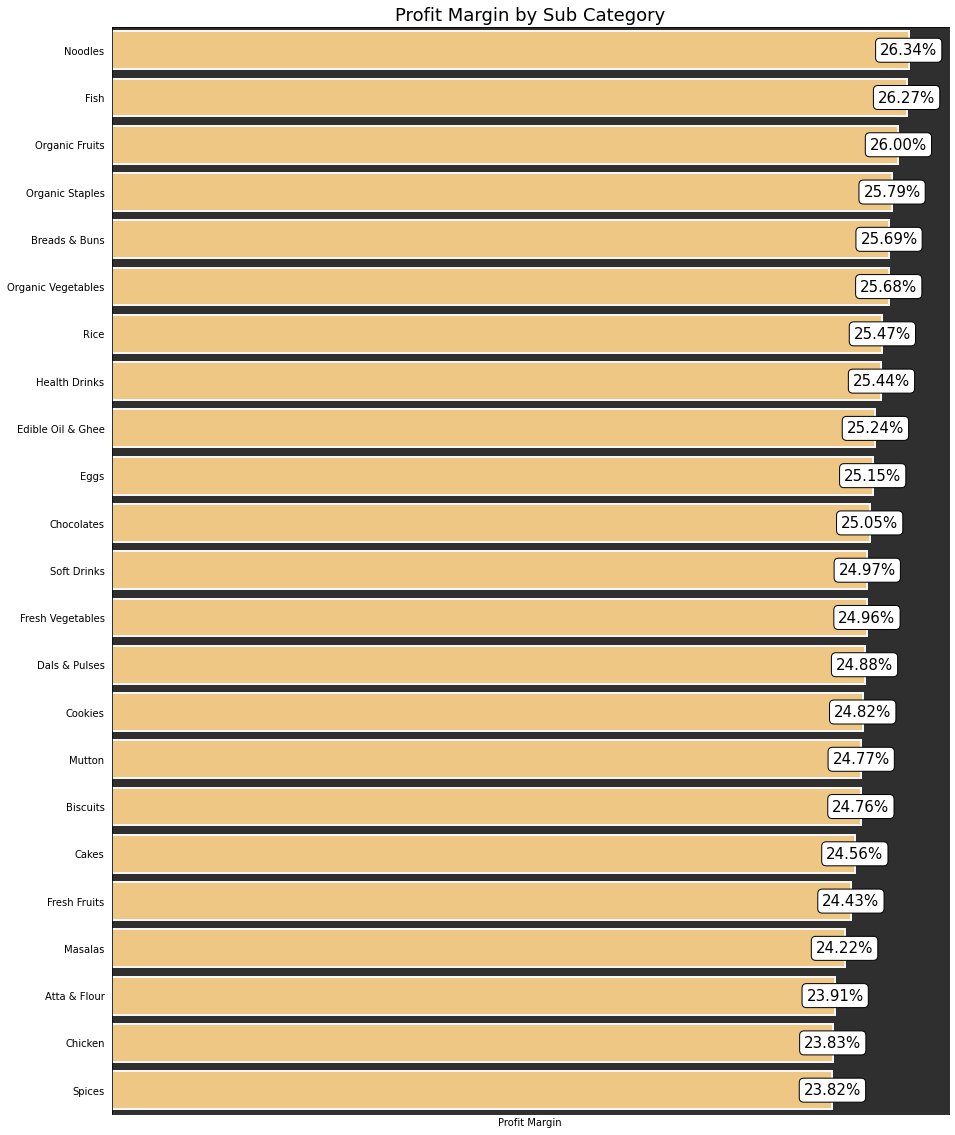

In [15]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (15,20)

# setting up the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2F')

# plotting a bar graph
sns.barplot(y='Sub Category', x='Profit Margin', data=profit, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

# annotating the values on the graph
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.2f}%'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# formatting the graph
plt.title('Profit Margin by Sub Category', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)

plt.show()

### How much did the company lose by giving discounts?

To find the amount that the company lost by giving discounts, we need to find the original price. We've the sold price of the product in the dataset. We also have the discount percentage for that product.

The formula to find the original price is (Sold Price * 100)/100 - (Discount Percent * 100)

In [16]:
df['Original Price'] = round((df['Sales'])*100/(100-(df['Discount']*100)),2)
df['Discounted Amount'] = df['Original Price'] - df['Sales']
df.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Year,Original Price,Discounted Amount
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.8,Tamil Nadu,2017,913.41,164.41
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.2,Tamil Nadu,2017,2987.34,627.34


In [17]:
discounts = pd.pivot_table(data=df, index='Sub Category',
               values='Discounted Amount', 
               aggfunc='sum').reset_index().sort_values(by='Discounted Amount', ascending=False)
discounts

,Sub Category,Discounted Amount
13,Health Drinks,328813.44
21,Soft Drinks,320158.77
2,Breads & Buns,226694.43
6,Cookies,224371.75
5,Chocolates,221926.05
16,Noodles,217662.48
8,Edible Oil & Ghee,209593.40
14,Masalas,207746.00
3,Cakes,206506.59
1,Biscuits,204938.36


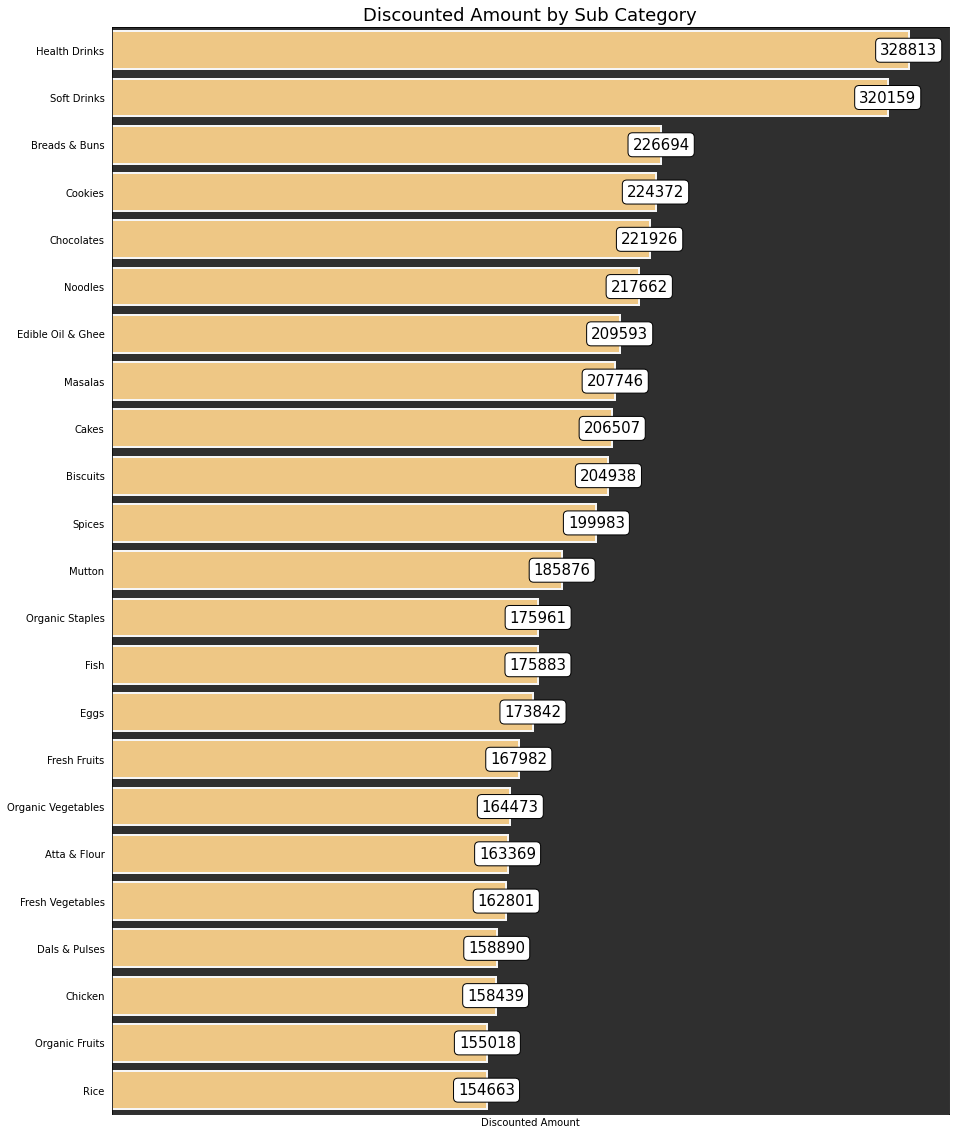

In [18]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (15,20)

# setting up the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2F')

# plotting a bar graph
sns.barplot(y='Sub Category', x='Discounted Amount', data=discounts, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

# annotating the values on the bar graph
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

#formatting the graph
plt.title('Discounted Amount by Sub Category', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)
plt.show()

### Total Sales & Orders by Year

In [19]:
year_performance = pd.pivot_table(data=df, index='Order Year', values=['Order ID', 'Sales', 'Profit'], 
               aggfunc={'Order ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index()
year_performance

,Order Year,Order ID,Profit,Sales
0,2015,1993,752529.11,2975599
1,2016,2102,797192.99,3131959
2,2017,2586,952814.94,3870658
3,2018,3312,1244182.88,4977512


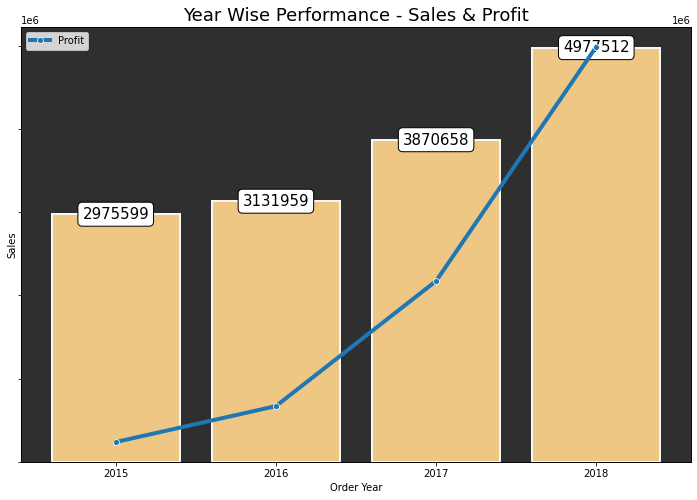

In [20]:
# setting up the graph size
plt.rcParams['figure.figsize'] = (12,8)

# setting up the background color
ax = plt.axes()
ax.set_facecolor('#2F2F2F')

# plotting a bar graph
ax1 = sns.barplot(x='Order Year', y='Sales', data=year_performance, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')
plt.tick_params(left=False, labelleft=False)

# annotating the values on the graph
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + 0.5 * p.get_width(), p.get_height(), '{:1.0f}'.format(height), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

# setting up the dual axis
ax2 = ax1.twinx()

# plotting a line graph on the secondary axis
sns.lineplot(x='Order Year', y='Profit', data=year_performance, linewidth=4, marker='o')

# formatting the graph
plt.title('Year Wise Performance - Sales & Profit', fontsize = 18)
plt.ylabel(None)
plt.legend(['Profit'], loc='upper left')
plt.tick_params(right=False, labelright=False)
plt.show()

## Answering the Questions

### 1) Who are the most loyal customers? 
Note: Customers who placed more than 45 orders every year 

We'll pivot the values by using the .pivot_table() function and then filter it with the above condition.

In [21]:
customers = pd.pivot_table(data=df, index='Customer Name', columns='Order Year', 
               values='Order ID', aggfunc='count')
customers = customers[(customers['2015']>45) & (customers['2016']>45) & (customers['2017']>45) & (customers['2018']>45)]
customers

Order Year,2015,2016,2017,2018
Customer Name,,,,
Amrish,51,52,59,65
Arutra,48,47,60,63


**Answer: Amrish and Arutra are the only customers that have placed more than 45 orders every year**

### 2) What is the rank of the sub category in 2018, that ranked the fifth in 2016?
Note: Take sales as the parameter to compute rank

We'll first pivot the data and then apply the rank() function.

In [22]:
sales_sc = pd.pivot_table(data=df, index='Sub Category', columns = 'Order Year', values='Sales', aggfunc='sum').reset_index()
sales_sc['Rank_2016'] = sales_sc['2016'].rank(method='max', ascending=False)
sales_sc['Rank_2018'] = sales_sc['2018'].rank(method='max', ascending=False)
sales_sc.sort_values(by='Rank_2016')

Order Year,Sub Category,2015,2016,2017,2018,Rank_2016,Rank_2018
21,Soft Drinks,184114,222429,276727,350604,1.0,2.0
13,Health Drinks,224977,203290,266848,356324,2.0,1.0
1,Biscuits,135267,182123,166289,200404,3.0,14.0
6,Cookies,155981,161416,195449,255367,4.0,6.0
3,Cakes,147329,157889,162974,217420,5.0,8.0
5,Chocolates,155870,151243,167337,259448,6.0,4.0
14,Masalas,133037,148994,183326,230869,7.0,7.0
2,Breads & Buns,151383,147953,175000,268250,8.0,3.0
11,Fresh Fruits,111462,134455,119827,185468,9.0,16.0
8,Edible Oil & Ghee,139676,133407,190193,204810,10.0,11.0


**Answer: Cakes ranked 5th in Sales in 2016. The rank of Cakes in 2018 is 8.**

### 3) Which Category is among the top 3 position in Sales, all the years?

In [23]:
sales_c = pd.pivot_table(data=df, index='Category', columns = 'Order Year', values='Sales', aggfunc='sum').reset_index()
sales_c['2015_Rank'] = sales_c['2015'].rank(method='max', ascending=False)
sales_c['2016_Rank'] = sales_c['2016'].rank(method='max', ascending=False)
sales_c['2017_Rank'] = sales_c['2017'].rank(method='max', ascending=False)
sales_c['2018_Rank'] = sales_c['2018'].rank(method='max', ascending=False)
sales_c

Order Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
0,Bakery,433979,487965,504263,686074,3.0,1.0,7.0,6.0
1,Beverages,409091,425719,543575,706928,6.0,6.0,5.0,4.0
2,"Eggs, Meat & Fish",482982,462055,565101,757263,1.0,3.0,3.0,2.0
3,Food Grains,356704,438736,609338,710494,7.0,4.0,1.0,3.0
4,Fruits & Veggies,409212,468441,516400,706674,5.0,2.0,6.0,5.0
5,Oil & Masala,423918,412725,562942,637603,4.0,7.0,4.0,7.0
6,Snacks,459713,436318,569039,772476,2.0,5.0,2.0,1.0


In [24]:
sales_c[(sales_c['2015_Rank'] <=3) & (sales_c['2016_Rank'] <=3) & (sales_c['2017_Rank'] <=3) & (sales_c['2018_Rank'] <=3)]

Order Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
2,"Eggs, Meat & Fish",482982,462055,565101,757263,1.0,3.0,3.0,2.0


**Answer: Only the Eggs, Meat & Fish Category is consistent in the sales across years.**

### 4) Did the region with least Sales/Order record the least Profit/Order?

In [25]:
sales_orders_region = pd.pivot_table(data=df, index='Region', values=['Order ID', 'Sales', 'Profit'], 
               aggfunc = {'Order ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
sales_orders_region['Sales Per Order'] = sales_orders_region['Sales']/sales_orders_region['Order ID']
sales_orders_region['Profit Per Order'] = sales_orders_region['Profit']/sales_orders_region['Order ID']
sales_orders_region[['Region', 'Sales Per Order', 'Profit Per Order']]

,Region,Sales Per Order,Profit Per Order
3,West,1498.202623,372.152548
1,East,1491.702247,377.228083
0,Central,1492.964270,368.836350
2,South,1507.387894,385.153113


**Answer: No, the region with the least Sales/Order is East, but it has the better Profit/Order than Central which has the least Profit/Order ratio.**

### 5) Which city has the more Chicken & Mutton lovers?

In [26]:
mutton = df[(df['Sub Category'] == 'Mutton') | (df['Sub Category'] == 'Chicken')]

mutton_pivot = pd.pivot_table(data=mutton, index='City', 
                               values='Order ID', aggfunc='count').sort_values(by='Order ID', ascending=False)
mutton_pivot.head(1)

,Order ID
City,
Kanyakumari,44


**Answer: Customers from Kanyakumari have ordered chicken and mutton more times than others.**

### 6) Name three cities which have the highest Sales/Customers for Cakes and Chocolates.

In [27]:
chocolate_cakes = df[(df['Sub Category'] == 'Cakes') | (df['Sub Category'] == 'Chocolates')]

avg_sales_per_customer = pd.pivot_table(data=chocolate_cakes, index='City', values=['Sales', 'Customer Name'], 
               aggfunc = {'Customer Name':'count', 'Sales':'sum'}).reset_index()
avg_sales_per_customer['Sales Per Customer'] = round(avg_sales_per_customer['Sales']/avg_sales_per_customer['Customer Name'], 2)
avg_sales_per_customer[['City','Sales Per Customer']].sort_values(by='Sales Per Customer', ascending=False).head(3)

,City,Sales Per Customer
16,Salem,1717.91
20,Trichy,1714.26
11,Namakkal,1625.75


**Answer: Salem, Trichy and Namakkal are the three cities that have the highest Sales/Customer for Cakes and Chocolate sub categories.**

## Conclusion

We delved into the grocery store sales dataset to find the summary metrics. We also framed few questions and answered them by performing data analysis. Framing our own questions to find answers from the dataset is a trait of a data analyst. I'll upload more complex questions and answers in the next version of this notebook.

If you like my work, please upvote. Please share your comments and suggestions.

I'll see you in the next version. Thank You!